- Harris
- Hessian
- Histogram of Oriented Gradients
- SIFT

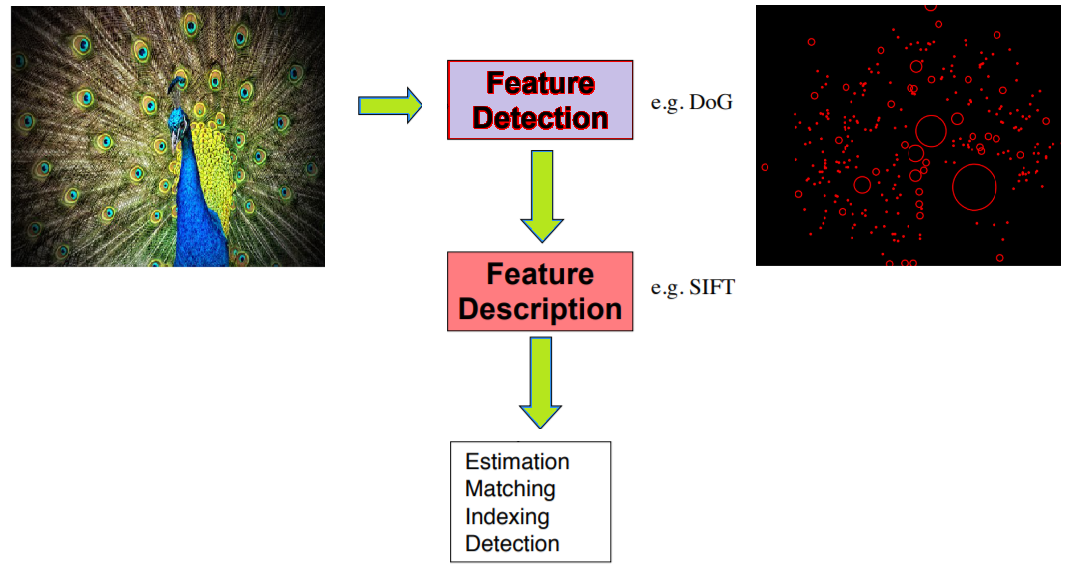

In [1]:
from IPython.display import Image
Image(filename='./images/input/fdetect.png',width=500)

# Harris Corner Detector

<font size="3">One early attempt to find these corners was done by Chris Harris & Mike Stephens in their paper A Combined Corner and Edge Detector in 1988, so now it is called Harris Corner Detector. He took this simple idea to a mathematical form. It basically finds the difference in intensity for a displacement of (u,v) in all directions. This is expressed as below:</font>

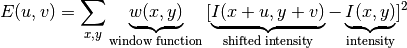

In [3]:
Image(filename='./images/input/Harris.png',width=500)

<font size="3">Window function is either a rectangular window or gaussian window which gives weights to pixels underneath.

We have to maximize this function E(u,v) for corner detection. That means, we have to maximize the second term. Applying Taylor Expansion to above equation and using some mathematical steps (please refer any standard text books you like for full derivation), we get the final equation as:</font>

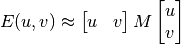

In [5]:
Image(filename='./images/input/Harris1.png',width=300)

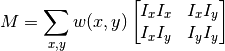

In [6]:
Image(filename='./images/input/Harris2.png',width=300)

<font size="3">Here, I_x and I_y are image derivatives in x and y directions respectively. (Can be easily found out using cv2.Sobel()).

Then comes the main part. After this, they created a score, basically an equation, which will determine if a window can contain a corner or not.</font>

In [7]:
Image(filename='./images/input/Harris3.png',width=300)

So the values of these eigen values decide whether a region is corner, edge or flat.

When |R| is small, which happens when \lambda_1 and \lambda_2 are small, the region is flat.
When R<0, which happens when \lambda_1 >> \lambda_2 or vice versa, the region is edge.
When R is large, which happens when \lambda_1 and \lambda_2 are large and \lambda_1 \sim \lambda_2, the region is a corner.
It can be represented in a nice picture as follows:

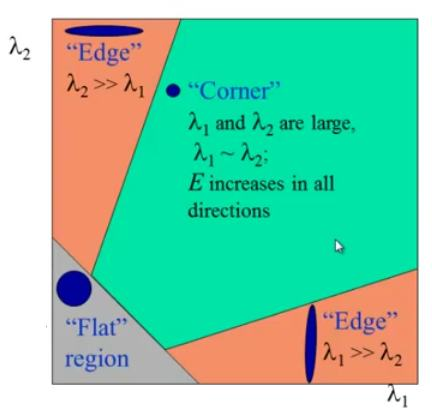

In [10]:
Image(filename='./images/input/Harris4.jpg',width=300)

## Harris Corner Detector in OpenCV

OpenCV has the function cv2.cornerHarris() for this purpose. Its arguments are :

- img - Input image, it should be grayscale and float32 type.
- blockSize - It is the size of neighbourhood considered for corner detection
- ksize - Aperture parameter of Sobel derivative used.
- k - Harris detector free parameter in the equation.


In [44]:
import cv2
import numpy as np

filename = './images/input/chess.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
cv2.imwrite('./images/output/cornerchess.jpg',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

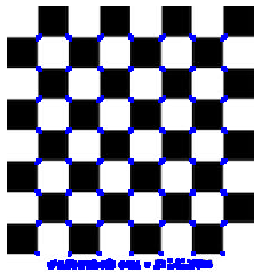

In [45]:
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.tight_layout()
plt.show()

In [42]:
import cv2
import numpy as np
img = cv2.imread('./images/input/chess.jpg', cv2.IMREAD_COLOR)
corners = cv2.cornerHarris(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 2, 3, 0.04)
corners = cv2.dilate(corners, None)

show_img = np.copy(img)
show_img[corners>0.01*corners.max()]=[0,0,255]

corners = cv2.normalize(corners, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
show_img = np.hstack((show_img, cv2.cvtColor(corners, cv2.COLOR_GRAY2BGR)))

cv2.imshow('Harris corner detector', show_img)
if cv2.waitKey(0) == 27:
    cv2.destroyAllWindows()

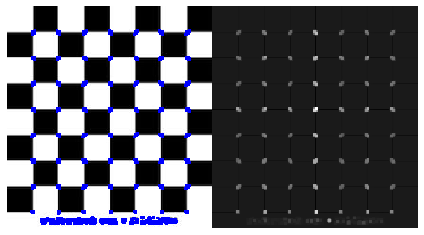

In [43]:
plt.axis('off')
plt.imshow(show_img, cmap='gray')
plt.tight_layout()
plt.show()

In [6]:
# fast = cv2.FastFeatureDetector_create(30, True, cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)
# kp = fast.detect(img)
# show_img = np.copy(img)
# for p in cv2.KeyPoint.convert(kp):
#     cv2.circle(show_img, tuple(p), 2, (0, 255, 0), cv2.FILLED)

# cv2.imshow('FAST corner detector', show_img)
# if cv2.waitKey(0) == 27:
#     cv2.destroyAllWindows()

In [7]:
# fast.setNonmaxSuppression(False)
# kp = fast.detect(img)

# for p in cv2.KeyPoint.convert(kp):
#     cv2.circle(show_img, tuple(p), 2, (0, 255, 0), cv2.FILLED)
    
# cv2.imshow('FAST corner detector', show_img)
# if cv2.waitKey(0) == 27:
#     cv2.destroyAllWindows()

## Corner with SubPixel Accuracy
<br>
<font size="3">
Sometimes, you may need to find the corners with maximum accuracy. OpenCV comes with a function cv2.cornerSubPix() which further refines the corners detected with sub-pixel accuracy. Below is an example. As usual, we need to find the harris corners first. Then we pass the centroids of these corners (There may be a bunch of pixels at a corner, we take their centroid) to refine them. Harris corners are marked in red pixels and refined corners are marked in green pixels. For this function, we have to define the criteria when to stop the iteration. We stop it after a specified number of iteration or a certain accuracy is achieved, whichever occurs first. We also need to define the size of neighbourhood it would search for corners.
</font>

In [40]:
import cv2
import numpy as np

filename = './images/input/chess.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv2.imwrite('./images/output/subpixel5.png',img)

True

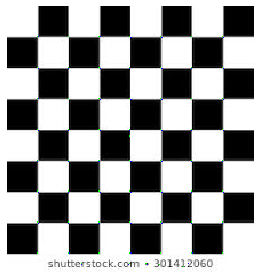

In [41]:
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.tight_layout()
plt.show()

## Harris Corner Detector in SKimage

In [9]:
from matplotlib import pylab as pylab
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, SimilarityTransform, AffineTransform, resize
import cv2
import numpy as np
from skimage import data
from skimage.util import img_as_float
from skimage.exposure import rescale_intensity
from skimage.measure import ransac

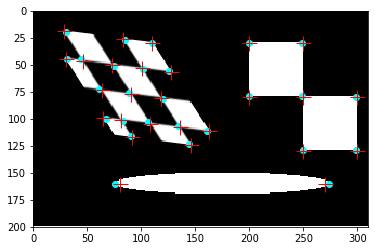

In [10]:
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

# Sheared checkerboard
tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(110, 30))
image = warp(data.checkerboard()[:90, :90], tform.inverse,
             output_shape=(200, 310))
# Ellipse
rr, cc = ellipse(160, 175, 10, 100)
image[rr, cc] = 1
# Two squares
image[30:80, 200:250] = 1
image[80:130, 250:300] = 1

coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 310, 200, 0))
plt.show()

# Determinant of Hessian (DoH)

<font size="3">The DoH approach is the fastest of all these approaches. It detects the blobs by computing maximums in the matrix of the Determinant of Hessian of the image. The size of blobs does not have any impact on the speed of detection. Both the bright blobs on the dark background and the dark blobs on the bright backgrounds are detected by this approach, but the small blobs are not detected accurately.</font>

### Blob Detection
<font color="Deeppink" size="3"> Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian</font>

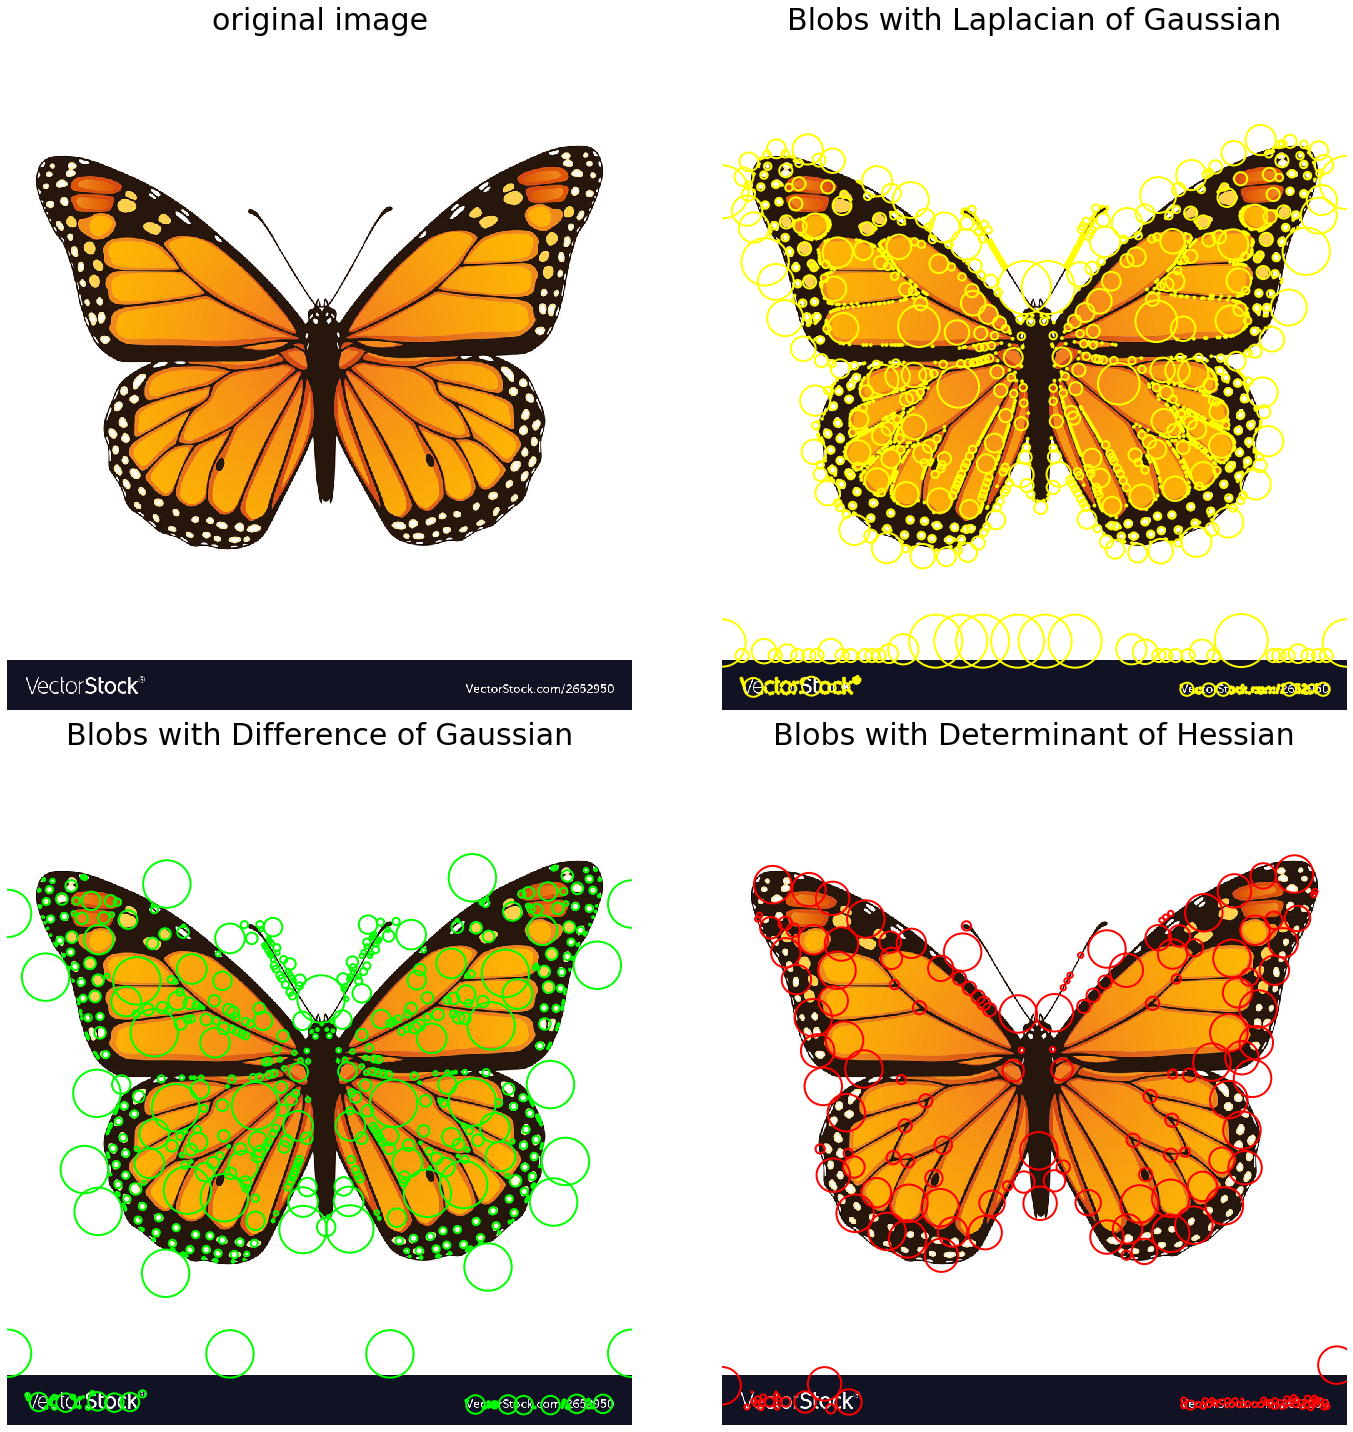

(None, None)

In [14]:
from numpy import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage import color

im = imread('./images/input/butterfly1.jpg') 
im_gray = rgb2gray(im)
log_blobs = blob_log(im_gray, max_sigma=30, num_sigma=10, threshold=.1)
log_blobs[:, 2] = sqrt(2) * log_blobs[:, 2] # Compute radius in the 3rd column
dog_blobs = blob_dog(im_gray, max_sigma=30, threshold=0.1)
dog_blobs[:, 2] = sqrt(2) * dog_blobs[:, 2]
doh_blobs = blob_doh(im_gray, max_sigma=30, threshold=0.005)
list_blobs = [log_blobs, dog_blobs, doh_blobs]
colors, titles = ['yellow', 'lime', 'red'], ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
sequence = zip(list_blobs, colors, titles)
fig, axes = pylab.subplots(2, 2, figsize=(20, 20), sharex=True, sharey=True)
axes = axes.ravel()
axes[0].imshow(im, interpolation='nearest')
axes[0].set_title('original image', size=30), axes[0].set_axis_off()
for idx, (blobs, color, title) in enumerate(sequence):
    axes[idx+1].imshow(im, interpolation='nearest')
    axes[idx+1].set_title('Blobs with ' + title, size=30)
    for blob in blobs:
        y, x, row = blob
        col = pylab.Circle((x, y), row, color=color, linewidth=2, fill=False)
        axes[idx+1].add_patch(col),    axes[idx+1].set_axis_off()
pylab.tight_layout(), pylab.show()

# Histogram of Oriented Gradients

- If you wish to, you can globally normalize the image
- Compute the horizontal and vertical gradient images
- Compute the gradient histograms
- Normalize across blocks
- Flatten into a feature descriptor vector

## Compute HOG descriptors with scikit-image

(225, 225) 1568


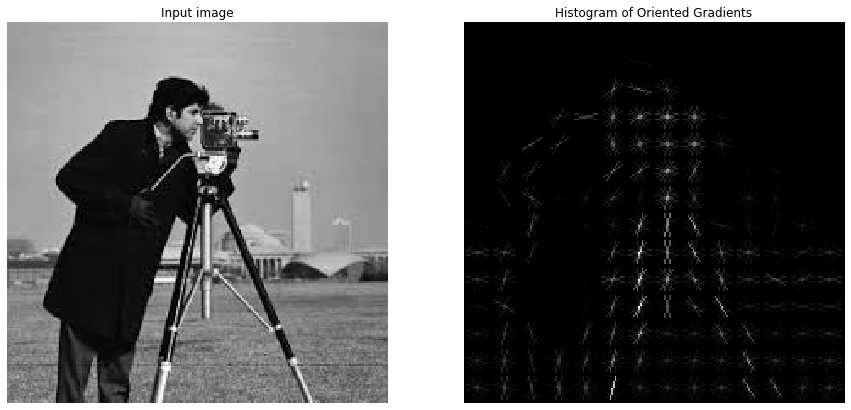

In [13]:
from skimage.feature import hog
from skimage import exposure
image = rgb2gray(imread('./images/input/cameraman.jpg'))
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True) 
print(image.shape, len(fd))
# ((256L, 256L), 2048)
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)
axes1.axis('off'), axes1.imshow(image, cmap=pylab.cm.gray), axes1.set_title('Input image')
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
axes2.axis('off'), axes2.imshow(hog_image_rescaled, cmap=pylab.cm.gray), axes2.set_title('Histogram of Oriented Gradients')
pylab.show()

# Scale-invariant feature transform(SIFT)

<font size ="3">Scale-invariant feature transform (SIFT) descriptors provide an alternative representation for image regions. They are very useful for matching images. As demonstrated earlier, simple corner detectors work well when the images to be matched are similar in nature (with respect to scale, orientation, and so on). But if they have different scales and rotations, the SIFT descriptors are needed to be used to match them. SIFT is not only just scale invariant, but it still obtains good results when rotation, illumination, and viewpoints of the images change as well. </font>

## Algorithm to compute SIFT descriptors

<font size="3">
<b>Scale-space extrema detection:</b> Search over multiple scales and image locations, the location and characteristic scales are given by DoG detector<br>
<b>Keypoint localization:</b> Select keypoints based on a measure of stability, keep only the strong interest points by eliminating the low-contrast and edge keypoints<br>
<b>Orientation assignment:</b> Compute the best orientation(s) for each keypoint region, which contributes to the stability of matching<br>
<b>Keypoint descriptor computation:</b> Use local image gradients at selected scale and rotation to describe each keypoint region<br>
    
As discussed, SIFT is robust with regard to small variations in illumination (due to gradient and normalization), pose (small affine variation due to orientation histogram), scale (by DoG), and intra-class variability (small variations due to histograms).
</font>

In [28]:
# make sure the opencv version is 3.3.0 with
# pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

import cv2
print(cv2.__version__)
# 3.3.0

img = cv2.imread('./images/input/monalisa.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None) # detect SIFT keypoints
 
img = cv2.drawKeypoints(img,kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow("Image", img);
cv2.imwrite('./images/output/me5_keypoints.jpg',img)

kp, des = sift.detectAndCompute(gray,None) # compute the SIFT descriptor

3.1.0


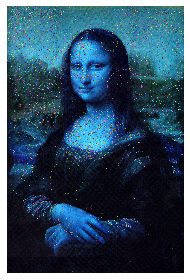

In [29]:
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.tight_layout()
plt.show()

In [27]:
# import cv2
# import numpy as np

# img = cv2.imread('./images/input/img1.jpg')
# gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# sift = cv2.xfeatures2d.SIFT_create()
# kp = sift.detect(gray,None)

# #img=cv2.drawKeypoints(gray,kp)

# #cv2.imwrite('./images/output/sift_keypoints.jpg',img)
# img=cv2.drawKeypoints(gray,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv2.imwrite('./images/output/sift_keypoints.jpg',img)

## Application – matching images with BRIEF, SIFT, and ORB

### Matching images with BRIEF binary descriptors with scikit-image

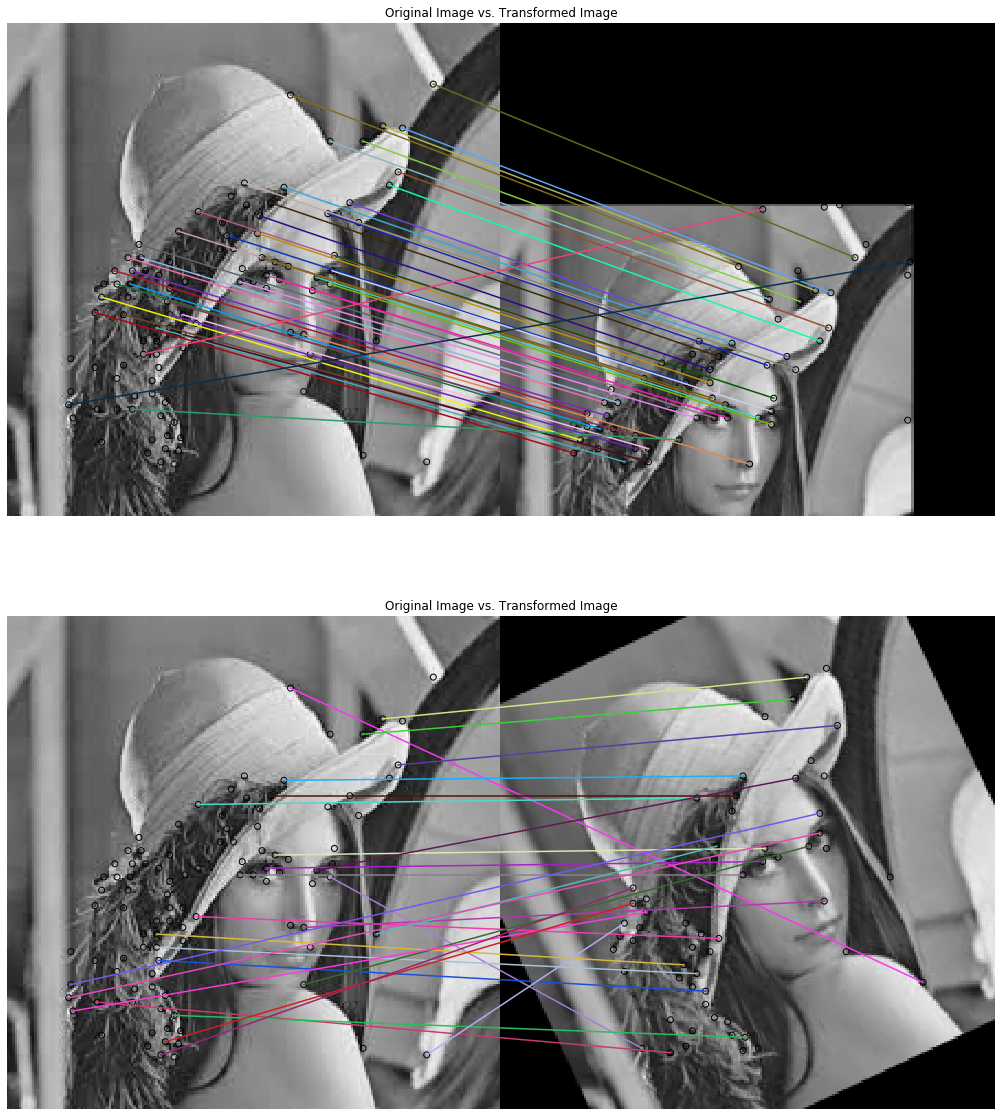

((0.0, 450.0, 225.0, 0.0),
 Text(0.5, 1, 'Original Image vs. Transformed Image'),
 None)

In [30]:
from skimage import transform as transform
from skimage.feature import (match_descriptors, corner_peaks, corner_harris, plot_matches, BRIEF)
img1 = rgb2gray(imread('./images/input/lena.jpg')) #data.astronaut())
affine_trans = transform.AffineTransform(scale=(1.2, 1.2), translation=(0,-100))
img2 = transform.warp(img1, affine_trans)
img3 = transform.rotate(img1, 25)
coords1, coords2, coords3 = corner_harris(img1), corner_harris(img2), corner_harris(img3)
coords1[coords1 > 0.01*coords1.max()] = 1
coords2[coords2 > 0.01*coords2.max()] = 1
coords3[coords3 > 0.01*coords3.max()] = 1
keypoints1 = corner_peaks(coords1, min_distance=5)
keypoints2 = corner_peaks(coords2, min_distance=5)
keypoints3 = corner_peaks(coords3, min_distance=5)
extractor = BRIEF()
extractor.extract(img1, keypoints1)
keypoints1, descriptors1 = keypoints1[extractor.mask], extractor.descriptors
extractor.extract(img2, keypoints2)
keypoints2, descriptors2 = keypoints2[extractor.mask], extractor.descriptors
extractor.extract(img3, keypoints3)
keypoints3, descriptors3 = keypoints3[extractor.mask], extractor.descriptors
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)
fig, axes = pylab.subplots(nrows=2, ncols=1, figsize=(20,20))
pylab.gray(), plot_matches(axes[0], img1, img2, keypoints1, keypoints2, matches12)
axes[0].axis('off'), axes[0].set_title("Original Image vs. Transformed Image")
plot_matches(axes[1], img1, img3, keypoints1, keypoints3, matches13)
axes[1].axis('off'), axes[1].set_title("Original Image vs. Transformed Image"), pylab.show()

### Matching with ORB feature detector and binary descriptor using scikit-image

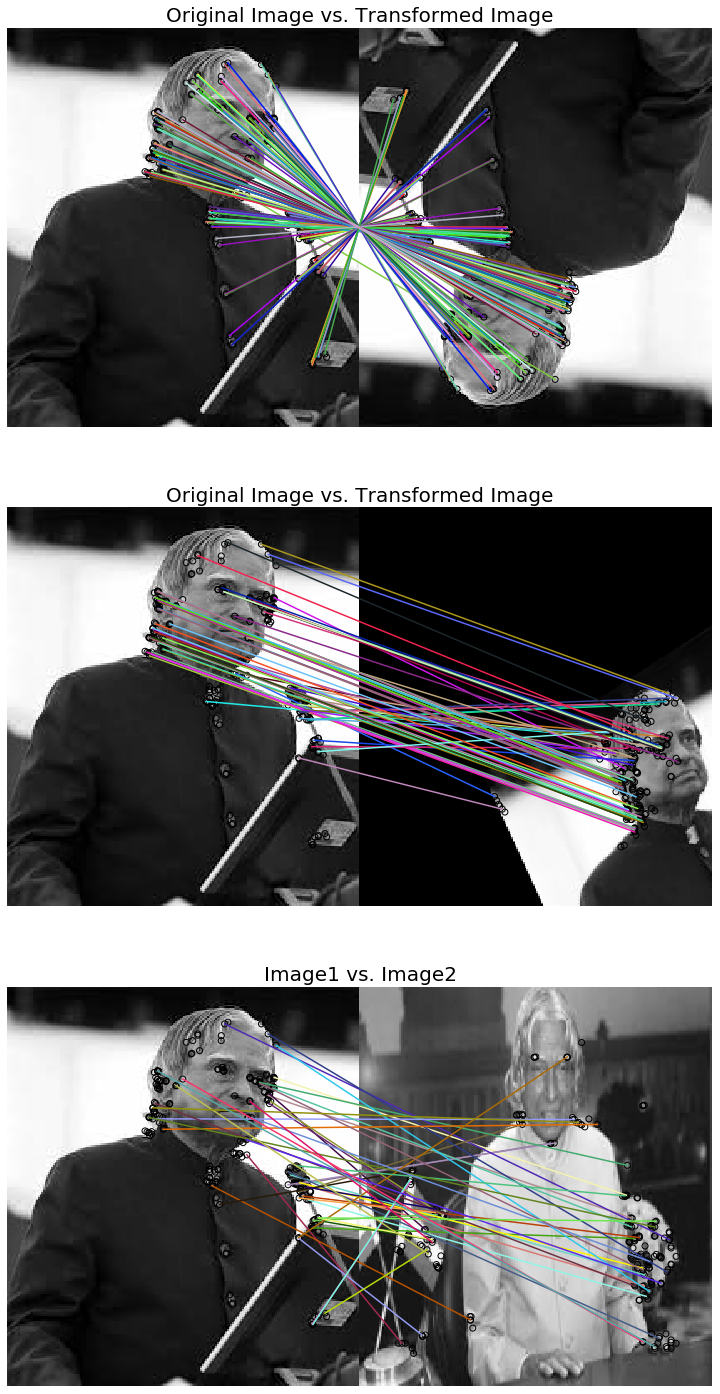

In [33]:
from skimage import transform as transform
from skimage.feature import (match_descriptors, ORB, plot_matches)
img1 = rgb2gray(imread('./images/input/Adulkalam1.jpg'))
img2 = transform.rotate(img1, 180)
affine_trans = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5, translation=(0, -200))
img3 = transform.warp(img1, affine_trans)
img4 = transform.resize(rgb2gray(imread('./images/input/adulkalam.jpg')), img1.shape, anti_aliasing=True)
descriptor_extractor = ORB(n_keypoints=200)
descriptor_extractor.detect_and_extract(img1)
keypoints1, descriptors1 = descriptor_extractor.keypoints, descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(img2)
keypoints2, descriptors2 = descriptor_extractor.keypoints, descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(img3)
keypoints3, descriptors3 = descriptor_extractor.keypoints, descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(img4)
keypoints4, descriptors4 = descriptor_extractor.keypoints, descriptor_extractor.descriptors
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)
matches14 = match_descriptors(descriptors1, descriptors4, cross_check=True)
fig, axes = pylab.subplots(nrows=3, ncols=1, figsize=(20,25))
pylab.gray()
plot_matches(axes[0], img1, img2, keypoints1, keypoints2, matches12)
axes[0].axis('off'), axes[0].set_title("Original Image vs. Transformed Image", size=20)
plot_matches(axes[1], img1, img3, keypoints1, keypoints3, matches13)
axes[1].axis('off'), axes[1].set_title("Original Image vs. Transformed Image", size=20)
plot_matches(axes[2], img1, img4, keypoints1, keypoints4, matches14)
axes[2].axis('off'), axes[2].set_title("Image1 vs. Image2", size=20)
pylab.show()

## Matching with ORB features using brute-force matching with python-opencv

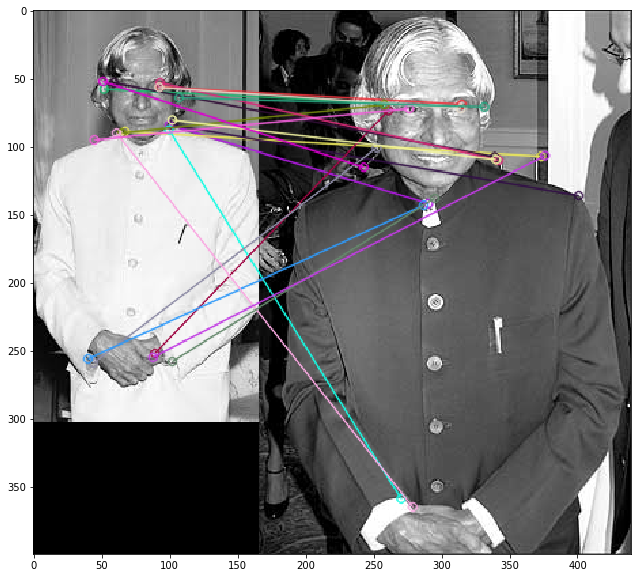

(<Figure size 1440x720 with 1 Axes>,
 None)

In [35]:
img1 = cv2.imread('./images/input/abdul.jpg',0) # queryImage
img2 = cv2.imread('./images/input/abdul1.jpg',0) # trainImage
# Create a ORB detector object
orb = cv2.ORB_create()
# find the keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# create a BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1, des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 20 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20], None, flags=2)
pylab.figure(figsize=(20,10)), pylab.imshow(img3), pylab.show()

## Brute-force matching with SIFT descriptors and ratio test with OpenCV

3.1.0


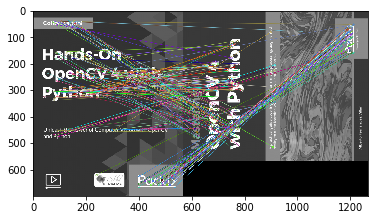

(<matplotlib.image.AxesImage at 0x7fbebc0cdc18>, None)

In [38]:
# make sure the opencv version is 3.3.0 with
# pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

import cv2
print(cv2.__version__)
# 3.3.0

img1 = cv2.imread('./images/input/opencv.png',0) # queryImage
img2 = cv2.imread('./images/input/opencv1.png',0) # trainImage
# Create a SIFT detector object
sift = cv2.xfeatures2d.SIFT_create() 
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good_matches = []
for m1, m2 in matches:
    if m1.distance < 0.75*m2.distance:
        good_matches.append([m1])
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2,good_matches, None, flags=2)
pylab.imshow(img3),pylab.show()